In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7117 - accuracy: 0.7669 - val_loss: 0.5071 - val_accuracy: 0.8336
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4872 - accuracy: 0.8308 - val_loss: 0.4612 - val_accuracy: 0.8400
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4429 - accuracy: 0.8446 - val_loss: 0.4381 - val_accuracy: 0.8462
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4157 - accuracy: 0.8552 - val_loss: 0.4172 - val_accuracy: 0.8578
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3967 - accuracy: 0.8603 - val_loss: 0.3967 - val_accuracy: 0.8646
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3804 - accuracy: 0.8667 - val_loss: 0.3929 - val_accuracy: 0.8664
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3675 - accuracy: 0.8693 - val_loss: 0.3810 - val_accuracy:

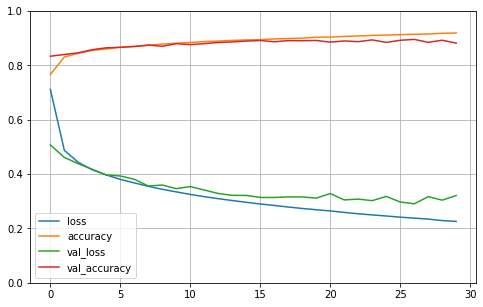

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
model.evaluate(X_test, Y_test)

NameError: name 'Y_test' is not defined